In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [65]:
# 示例数据
study_labels = ['A Ranning: Denmark, 2022', 'AL Pitman: British, 2016', 'HC Wilcox: Sweden, 2010', 
                'LV Burrell: Norway, 2018', 'HY Ho: China Taiwan, 2023', 'MR Phillips: China Mainland, 2002',
                'XY Li: China Mainland, 2008', 'ZZ Liu: China Mainland, 2020',
                'IH Song: South Korea, 2015', 'HM Gravseth: Norway, 2010','C Björkenstam: Sweden, 2017',
                'S Chan: New Zealand, 2018', 'T Niederkrotenthaler: Sweden, 2012'
                ]
effect_sizes = np.array([3.18, 1.65, 1.9, 
                         2.86, 3.31, 3.9,
                         3.6, 2.97,
                         4.42, 1.82, 2.9, 
                         1.68, 2.53
                         ])
ci_low = np.array([2.84, 1.12, 1.4, 
                   2.41, 2.75, 2.4,
                   1.1, 1.39, 
                   1.8, 1.04, 1.4, 
                   1.2, 1.76
                   ])
ci_high = np.array([3.58, 2.42, 2.5, 
                    3.39, 3.98, 6.3,
                    12.2, 6.34,
                    10.8, 2.59, 5.9, 
                    2.17, 3.66
                    ])

In [66]:
# 计算权重
weights = 1 / ((ci_high - ci_low) / (2 * 1.96))**2

# 计算加权平均效应大小
weighted_effect_size = np.sum(weights * effect_sizes) / np.sum(weights)

# 计算标准误差
se_combined = np.sqrt(1 / np.sum(weights))

# 计算效应大小的置信区间
ci_low_combined = weighted_effect_size - 1.96 * se_combined
ci_high_combined = weighted_effect_size + 1.96 * se_combined

# 计算z值
z_value = weighted_effect_size / se_combined

# 计算p值
p_value = 2 * (1 - norm.cdf(np.abs(z_value)))

In [67]:
# 打印结果
print(f"Combined Effect Size: {weighted_effect_size}")
print(f"Standard Error: {se_combined}")
print(f"Z-value: {z_value}")
print(f"P-value: {p_value}")

Combined Effect Size: 2.5247961299764867
Standard Error: 0.09726392059966504
Z-value: 25.958198213790507
P-value: 0.0


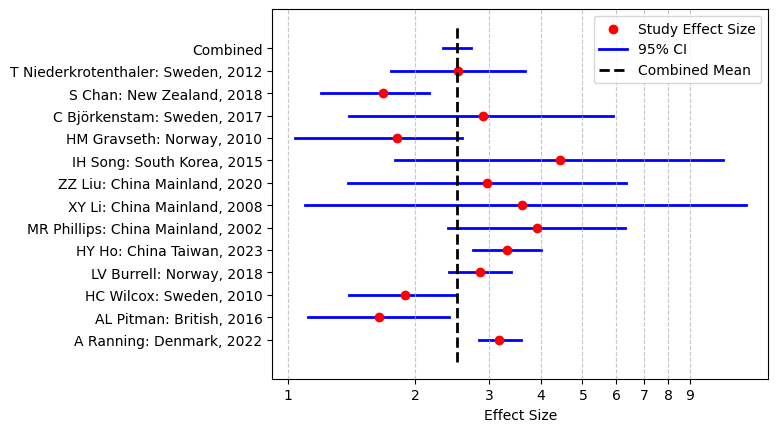

In [91]:
# 创建森林图
fig, ax = plt.subplots()

# 绘制效应大小的点
ax.scatter(effect_sizes, range(len(study_labels)), color='red', zorder=5, label='Study Effect Size')

# 绘制置信区间的线（独立研究）
for i, label in enumerate(study_labels):
    ax.plot([ci_low[i], ci_high[i]], [i, i], color='blue', linewidth=2, zorder=1)

# 绘制置信区间的线（合并效应）
ax.plot([ci_low_combined, ci_high_combined], [len(study_labels), len(study_labels)], color='blue', linewidth=2, zorder=1, label='95% CI')

# 绘制中间线
ax.plot([weighted_effect_size, weighted_effect_size], [len(study_labels) - 14, len(study_labels) + 1], color='black', linewidth=2, zorder=10, label='Combined Mean', linestyle='--')

# 设置y轴标签
ax.set_yticks(range(len(study_labels) + 1))
ax.set_yticklabels(study_labels + ['Combined'])

ax.set_xscale('log')

# 手动设置刻度
xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9,]  # 你希望显示的非对数刻度
ax.set_xticks(xticks)
ax.set_xticklabels([f'${val}$' for val in xticks])

# 添加网格线
ax.grid(axis='x', linestyle='--', alpha=0.7)

# 添加标签
ax.set_xlabel('Effect Size')
ax.legend()

# 显示图形
plt.show()